### Predict CLTV of a customer

In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/keerthivasan7572@gmail.com/train_BRCpofr.csv")
train_data = df1.toPandas()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### DATA Undestanding

In [0]:
train_data.isnull().sum()

Out[5]: id                0
gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [0]:
train_data.describe()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
count,89392,89392,89392,89392,89392,89392,89392,89392,89392,89392,89392,89392
unique,89392,2,2,3,4,2,9,10889,2,3,3,18796
top,1,Male,Urban,High School,5L-10L,1,6,0,More than 1,A,Platinum,62772
freq,1,50497,62455,46247,52716,51444,17769,17671,60263,56644,47796,50


In [0]:
train_data.shape

Out[7]: (89392, 12)

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  object
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  object
 6   vintage         89392 non-null  object
 7   claim_amount    89392 non-null  object
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  object
dtypes: object(12)
memory usage: 8.2+ MB


In [0]:
dummies_gender = pd.get_dummies(train_data.gender)
merge = pd.concat([train_data,dummies_gender],axis =1)
train_data_temp = merge.drop(['Female','gender'],axis=1)

In [0]:
dummies_area = pd.get_dummies(train_data_temp.area)
merge=pd.concat([train_data_temp,dummies_area],axis=1)
train_data_temp = merge.drop(['area','Rural'],axis=1)

In [0]:
train_data_temp=pd.get_dummies(train_data_temp, columns=['qualification'], drop_first=True)
train_data_temp=pd.get_dummies(train_data_temp, columns=['num_policies'], drop_first=True)
train_data_temp=pd.get_dummies(train_data_temp, columns=['type_of_policy'], drop_first=True)
train_data_temp=pd.get_dummies(train_data_temp, columns=['policy'], drop_first=True)

In [0]:
train_data_temp=pd.get_dummies(train_data_temp, columns=['income'], drop_first=False)

In [0]:
train_data_temp = train_data_temp.astype(int)

In [0]:
tain_data_after_filter = train_data_temp.drop(['id'], axis =1)

In [0]:
tain_data_after_filter.shape

Out[15]: (89392, 17)

In [0]:
# tain_data_after_filter.hist(bins=10,figsize=(10,10))
# plt.show()

Out[17]: array([[<AxesSubplot:xlabel='marital_status', ylabel='marital_status'>,
        <AxesSubplot:xlabel='vintage', ylabel='marital_status'>,
        <AxesSubplot:xlabel='claim_amount', ylabel='marital_status'>,
        <AxesSubplot:xlabel='cltv', ylabel='marital_status'>,
        <AxesSubplot:xlabel='Male', ylabel='marital_status'>,
        <AxesSubplot:xlabel='Urban', ylabel='marital_status'>,
        <AxesSubplot:xlabel='qualification_High School', ylabel='marital_status'>,
        <AxesSubplot:xlabel='qualification_Others', ylabel='marital_status'>,
        <AxesSubplot:xlabel='num_policies_More than 1', ylabel='marital_status'>,
        <AxesSubplot:xlabel='type_of_policy_Platinum', ylabel='marital_status'>,
        <AxesSubplot:xlabel='type_of_policy_Silver', ylabel='marital_status'>,
        <AxesSubplot:xlabel='policy_B', ylabel='marital_status'>,
        <AxesSubplot:xlabel='policy_C', ylabel='marital_status'>,
        <AxesSubplot:xlabel='income_2L-5L', ylabel='marital_st

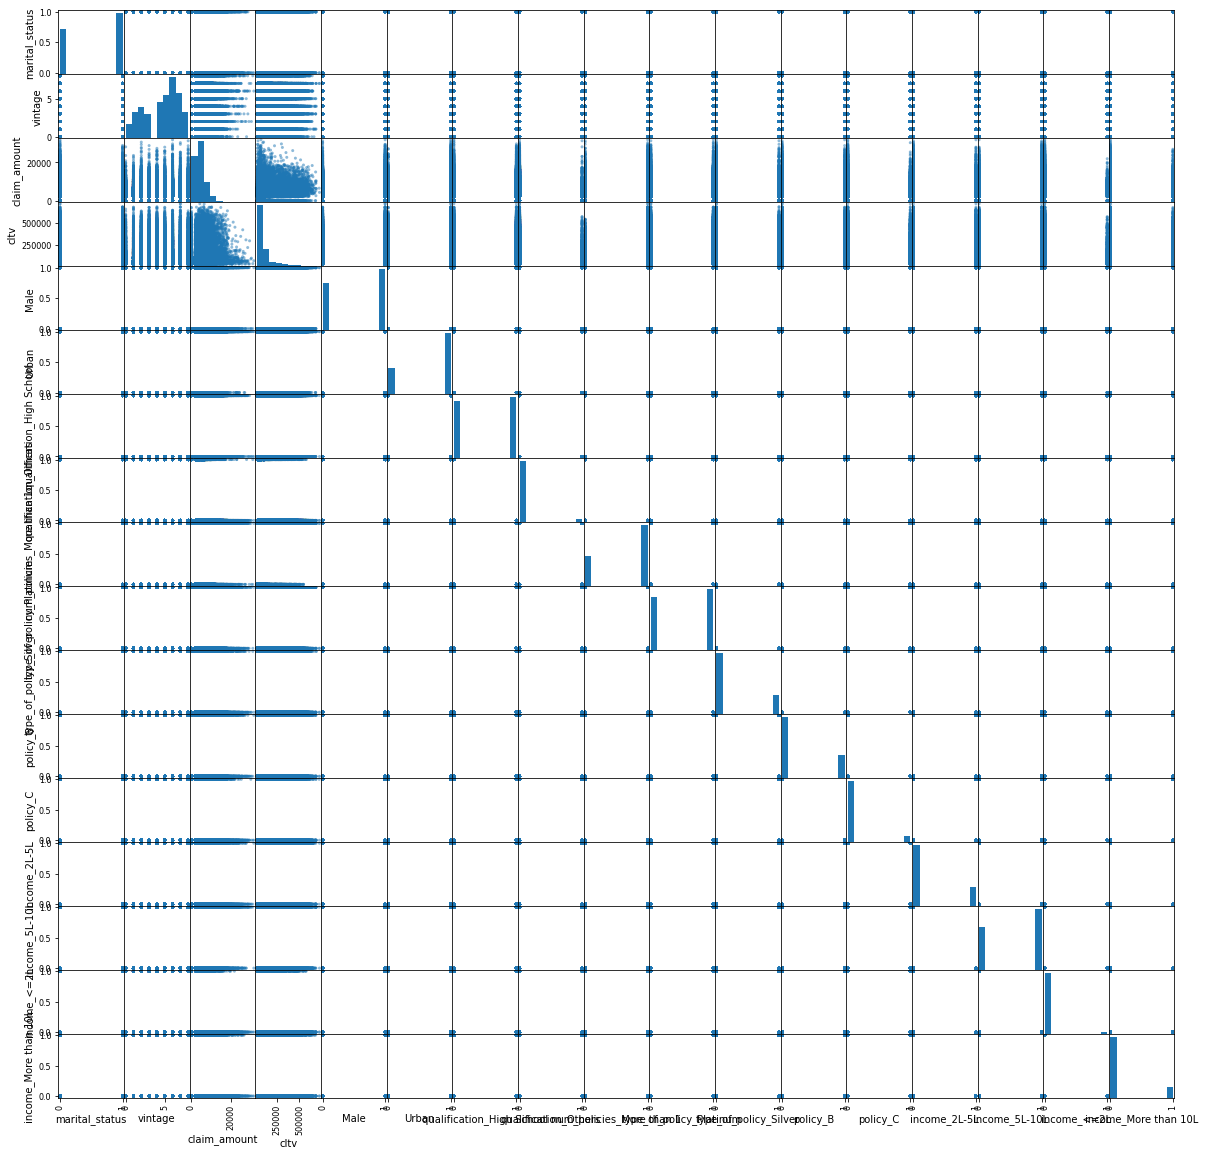

In [0]:
from pandas.plotting import scatter_matrix

scatter_matrix(tain_data_after_filter,figsize=(20,20))

In [0]:
tain_data_after_filter.corr()

,marital_status,vintage,claim_amount,cltv,Male,Urban,qualification_High School,qualification_Others,num_policies_More than 1,type_of_policy_Platinum,type_of_policy_Silver,policy_B,policy_C,income_2L-5L,income_5L-10L,income_<=2L,income_More than 10L
marital_status,1.000000,-0.011686,-0.114924,-0.077744,0.070468,-0.048739,-0.016921,0.003188,-0.082363,-0.015609,0.004057,-0.042759,0.016472,-0.051020,0.052987,-0.009521,-0.008394
vintage,-0.011686,1.000000,0.009579,0.020608,0.005827,0.001145,-0.023877,-0.008955,0.050699,-0.009788,0.013016,0.094780,-0.023712,0.021922,-0.017905,0.005197,-0.003478
claim_amount,-0.114924,0.009579,1.000000,0.180344,0.049773,0.451054,0.061432,-0.037651,0.155281,0.007126,-0.021770,-0.163355,0.005137,0.153396,-0.064905,0.076035,-0.122582
cltv,-0.077744,0.020608,0.180344,1.000000,-0.001318,0.133107,0.013329,-0.046898,0.360414,0.021295,-0.033617,-0.058261,0.031613,0.070761,-0.038249,0.021668,-0.039879
Male,0.070468,0.005827,0.049773,-0.001318,1.000000,0.042516,-0.034122,-0.004402,-0.052871,0.015893,-0.017956,0.003375,0.007699,-0.015237,0.032893,-0.036624,-0.012460
Urban,-0.048739,0.001145,0.451054,0.133107,0.042516,1.000000,0.059079,-0.041150,0.121898,0.014939,-0.031046,-0.176116,0.014745,0.204523,-0.086828,0.093010,-0.159729
qualification_High School,-0.016921,-0.023877,0.061432,0.013329,-0.034122,0.059079,1.000000,-0.216524,0.005870,0.034232,-0.054251,-0.086125,0.028580,-0.003956,0.012213,0.010027,-0.015993
qualification_Others,0.003188,-0.008955,-0.037651,-0.046898,-0.004402,-0.041150,-0.216524,1.000000,-0.072464,-0.037038,0.028252,0.016326,0.014580,-0.007307,-0.003528,0.000120,0.013406
num_policies_More than 1,-0.082363,0.050699,0.155281,0.360414,-0.052871,0.121898,0.005870,-0.072464,1.000000,0.050753,-0.056894,0.010923,-0.019718,0.076170,-0.058476,0.031007,-0.022319
type_of_policy_Platinum,-0.015609,-0.009788,0.007126,0.021295,0.015893,0.014939,0.034232,-0.037038,0.050753,1.000000,-0.594172,-0.031513,-0.064944,-0.021355,0.019327,0.007980,-0.004353


Out[19]: <AxesSubplot:>

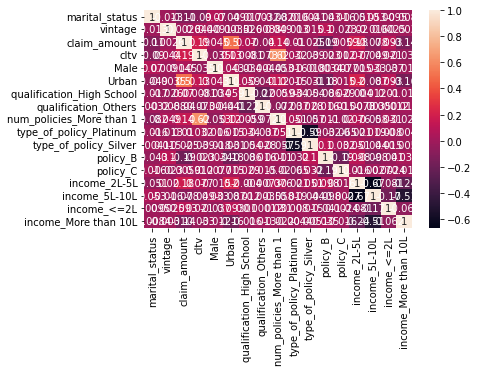

In [0]:
#spearman rank corr. to measure the strength and direction between variable
corr_spear=tain_data_after_filter.corr(method='spearman')
sns.heatmap(corr_spear,annot=True)

In [0]:
target_name = 'cltv'

y = tain_data_after_filter[target_name]

X = tain_data_after_filter.drop(target_name, axis =1)

In [0]:
#after back proprgation with OLS 
X = X.drop(['vintage'],axis =1)

In [0]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y): 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

## Hypertuning parameter

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
# param_test1 = {'n_estimators':[10,30,40]}
# gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
# param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
# gsearch1.fit(X_train,y_train)
# gsearch1.best_params_, gsearch1.best_score_

In [0]:
# GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1, param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04], 'max_depth': [4, 6, 8, 10], 'n_estimators': [10, 20, 30, 40], 'subsample': [0.9, 0.5, 0.2, 0.1]})

## 7 Building GradientBoosting Algorithm

In [0]:
#GradientBoostingRegressor for continous value

reg = GradientBoostingRegressor(learning_rate=0.1, n_estimators=50,max_depth=6,min_samples_split=1200, min_samples_leaf=60, subsample=0.8,max_features=7,random_state=0)
reg.fit(X, y)

Out[27]: GradientBoostingRegressor(max_depth=6, max_features=7, min_samples_leaf=60,
                          min_samples_split=1200, n_estimators=50,
                          random_state=0, subsample=0.8)

In [0]:
y_pred = reg.predict(X_test)

In [0]:
# train score

train_score = reg.score(X_train,y_train)
print('Train_score',train_score)

from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

print("r_2 Score",score)


Train_score 0.16819662122922796
r_2 Score 0.17060932368988768


In [0]:
from sklearn import metrics

print("Mean Absolute  Error",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Square Error",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute  Error 50396.2355221401
Mean Squared Error 6919903533.917042
Root Mean Square Error 224.49105889130664


In [0]:
df4 = pd.DataFrame({'Actual':y_test,'predicted':y_pred,'variance':y_test-y_pred})
df4.head()

,Actual,predicted,variance
109,81072,50059.927494,31012.072506
131,334836,140898.885003,193937.114997
411,265716,145101.061971,120614.938029
440,181632,49367.564768,132264.435232
521,380532,120905.803371,259626.196629


##END of model

# Backward Elimination Method Procedure

# Step 1: 
First Step in  backward elimination is select a significance level or Select P-value

Usually in most cases 5% Significance level  is selected . That means  P-value will be 0.5 you can change this value depending on your project


# Step 2:

Second Step is <b> fit your machine learning models with all features selected </b>

So if there are 50 features you include all of them  in your model  and fit model on your test datset . No changes here



# Step 3:

In Step 3,Identify feature or predictor  which has highest P-value


# Step 4:

This is Significant Step Here we take Decissions . In prevous Step3 : we identified feature  which has highest P-Value

- if P-Value is greater than significance level - we selected and remove this feature from our dataset
- if P-valie is less than Significance Level  we just jump to Step 6 which means that we are done


# Step 5
Once we find out feature  which has to be removd from our dataset  we will fir the model again  with new dataset After fitting a model with new dataset  we will jump back to step 3:

This Process will continue untill we reach a point  in step 4 where  highest P-Value  from all remaining features  in datset is  less than significance level selected step 1: 


In our Example this means iterate  from step 3 to Step 5 and back till  highest P-Value  in dataset is less than 0.05

Out of  50 asssumed features   we might filter out  good 10 features


# Step 6:
Once We reach Step 6 We are done  with Feature Selection process we have Sucessfully used Backward Elimination Method

In [0]:
import statsmodels.api as sm

In [0]:
ols =sm.OLS(endog=y, exog=X).fit()
ols.summary()

OLS Regression Results 
 
 Dep. Variable: cltv R-squared: 0.152 
 
 
 Model: OLS Adj. R-squared: 0.152 
 
 
 Method: Least Squares F-statistic: 1146. 
 
 
 Date: Mon, 23 Jan 2023 Prob (F-statistic): 0.00 
 
 
 Time: 06:19:08 Log-Likelihood: -1.1398e+06 
 
 
 No. Observations: 89392 AIC: 2.280e+06 
 
 
 Df Residuals: 89377 BIC: 2.280e+06 
 
 
 Df Model: 14 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 marital_status -7193.7019 572.739 -12.560 0.000 -8316.264 -6071.139 
 
 
 claim_amount 2.6966 0.098 27.475 0.000 2.504 2.889 
 
 
 Male 2342.9402 567.917 4.125 0.000 1229.828 3456.052 
 
 
 Urban 6305.0496 702.684 8.973 0.000 4927.796 7682.303 
 
 
 qualification_High School -945.3437 576.011 -1.641 0.101 -2074.321 183.633 
 
 
 qualification_Others -8090.2324 1431.801 -5.650 0.000 -1.09e+04 -5283.915 
 
 
 num_policies_More than 1 6.499e+04 609.920 106.558 0.000 6.38e+04 6.62e+04 
 
 
 type_of_policy_Platinum -668.8455 697.693 -0.959 0.338 -2036.318 698.627 
 
 
 type_of_policy_Silver -2416.4516 825.314 -2.928 0.003 -4034.059 -798.844 
 
 
 policy_B -7561.3422 664.679 -11.376 0.000 -8864.106 -6258.579 
 
 
 policy_C 9649.6748 994.915 9.699 0.000 7699.652 1.16e+04 
 
 
 income_2L-5L 4.792e+04 1260.333 38.018 0.000 4.54e+04 5.04e+04 
 
 
 income_5L-10L 4.288e+04 1081.565 39.648 0.000 4.08e+04 4.5e+04 
 
 
 income_<=2L 4.356e+04 2257.020 19.299 0.000 3.91e+04 4.8e+04 
 
 
 income_More than 10L 4.086e+04 1207.720 33.830 0.000 3.85e+04 4.32e+04 
 
 
 
 
 Omnibus: 51165.337 Durbin-Watson: 1.994 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 403330.182 
 
 
 Skew: 2.731 Prob(JB): 0.00 
 
 
 Kurtosis: 11.857 Cond. No. 5.10e+04 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 5.1e+04. This might indicate that there are strong multicollinearity or other numerical problems.

## Display result/plot

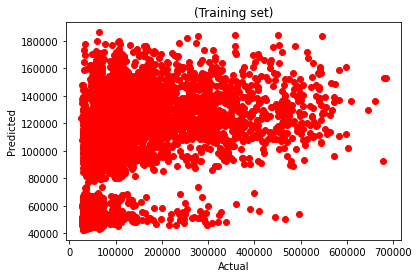

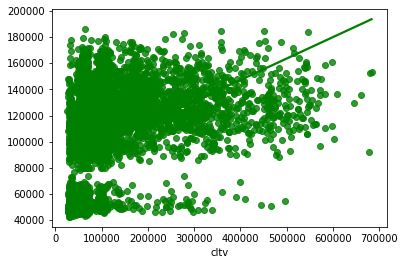

In [0]:
plt.scatter(y_test, y_pred, color = "red")
plt.title("(Training set)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');